# IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.display import display
import plotly.express as px
from collections import Counter
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from datetime import date
import missingno as msno
import numpy as np
from matplotlib.patches import Rectangle
import warnings
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')
sns.set(style='white')
plt.clf()
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [2]:
df = pd.read_csv('water_potability.csv')
df.head().T

,0,1,2,3,4
ph,NaN,3.716080,8.099124,8.316766,9.092223
Hardness,204.890455,129.422921,224.236259,214.373394,181.101509
Solids,20791.318981,18630.057858,19909.541732,22018.417441,17978.986339
Chloramines,7.300212,6.635246,9.275884,8.059332,6.546600
Sulfate,368.516441,NaN,NaN,356.886136,310.135738
Conductivity,564.308654,592.885359,418.606213,363.266516,398.410813
Organic_carbon,10.379783,15.180013,16.868637,18.436524,11.558279
Trihalomethanes,86.990970,56.329076,66.420093,100.341674,31.997993
Turbidity,2.963135,4.500656,3.055934,4.628771,4.075075
Potability,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


*DESCRIPTION OF EACH COLUMN*
- ph: pH of 1. water (0 to 14).
- Hardness: Capacity of water to precipitate soap in mg/L.
- Solids: Total dissolved solids in ppm.
- Chloramines: Amount of Chloramines in ppm.
- Sulfate: Amount of Sulfates dissolved in mg/L.
- Conductivity: Electrical conductivity of water in μS/cm.
- Organic_carbon: Amount of organic carbon in ppm.
- Trihalomethanes: Amount of Trihalomethanes in μg/L.
- Turbidity: Measure of light emiting property of water in NTU.
- Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


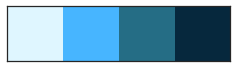

In [5]:
# Determine the colors which we will use in the whole project
colors = ['#DFF6FF','#47B5FF','#256D85',"#06283D"]
sns.palplot(colors)

In [6]:
# Uniform the columns and records to avoid the inconsistencies
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df.sulfate.nunique()

2495

In [8]:
#create approve limit for each features based on data available in Google search
col=df.columns[0:9].to_list()
min_val=[6.5,60,500,0,3,200,0,0,0]
max_val=[8.5,120,1000,4,250,400,10,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=col)

In [9]:
limit

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,6.5,60,500,0,3,200,0,0,0
1,8.5,120,1000,4,250,400,10,80,5


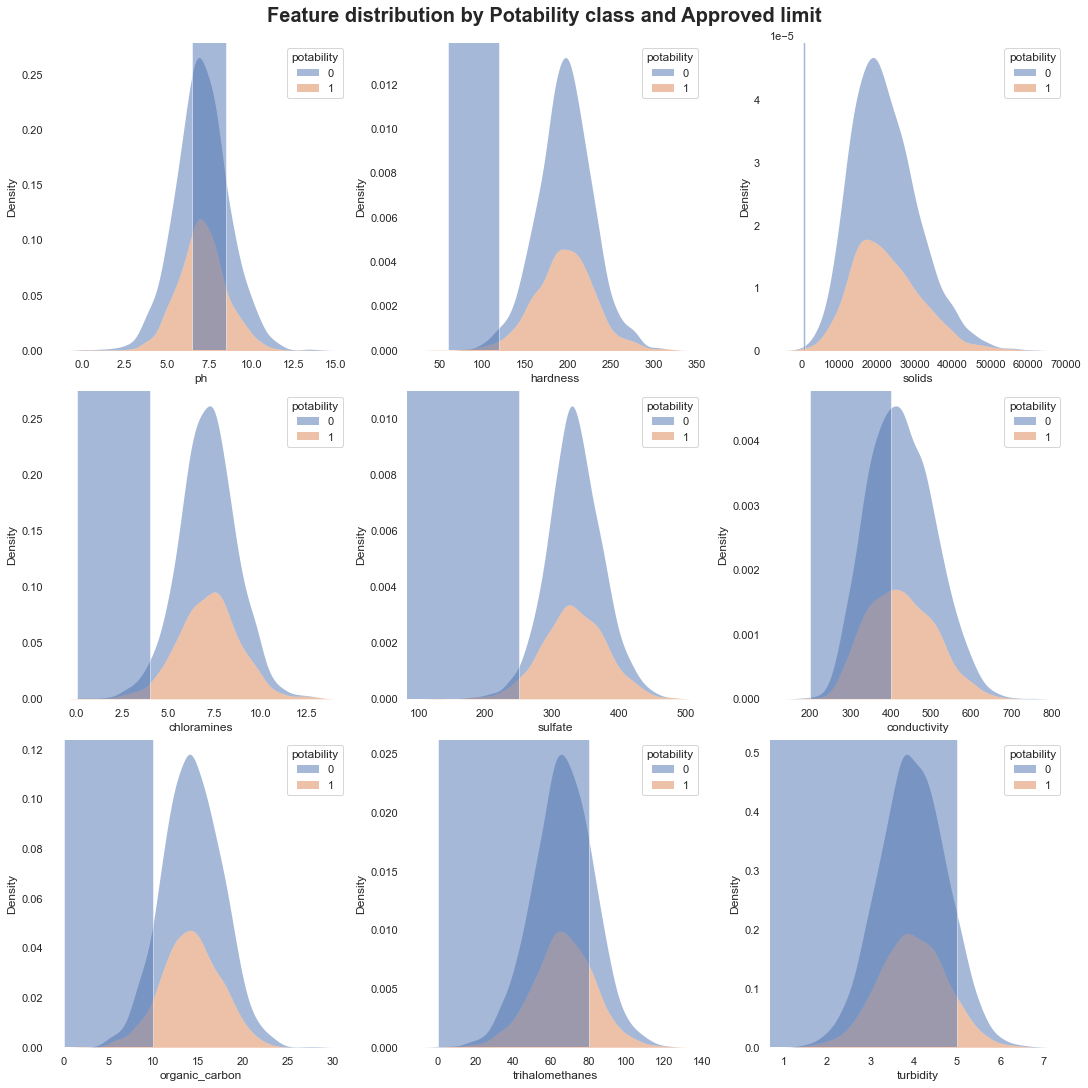

In [10]:
#int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
int_cols = df.columns[0:9].to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, 
                linewidth=0)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

## HARDNESS OF WATER

In [11]:
fig = px.histogram(df,x='hardness',y=Counter(df['hardness']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',x=0.53,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [12]:
fig = px.histogram(df,x='ph',y=Counter(df['ph']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [13]:
fig = px.histogram(df,x='solids',y=Counter(df['solids']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [14]:
fig = px.histogram(df,x='chloramines',y=Counter(df['chloramines']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [15]:
fig = px.histogram(df,x='sulfate',y=Counter(df['sulfate']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [16]:
fig = px.histogram(df,x='conductivity',y=Counter(df['conductivity']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [17]:
fig = px.histogram(df,x='organic_carbon',y=Counter(df['organic_carbon']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [18]:
fig = px.histogram(df,x='trihalomethanes',y=Counter(df['trihalomethanes']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[1],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [19]:
fig = px.histogram(df,x='turbidity',y=Counter(df['turbidity']),color='potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors[1],colors[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors[2],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors[2],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

## HANDLING MISSING VALUES

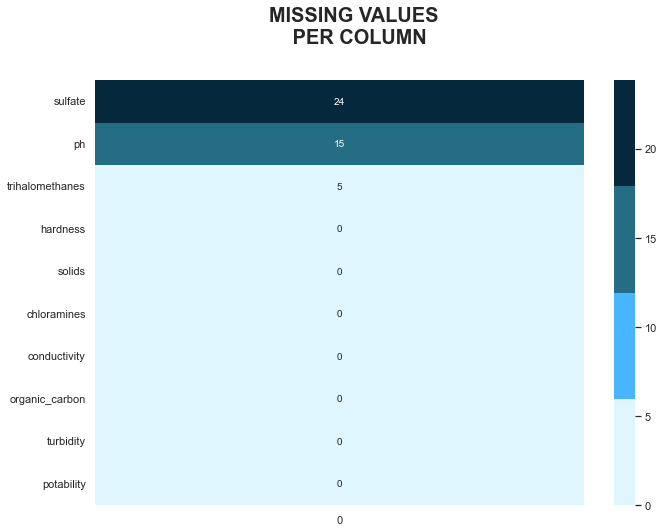

In [20]:
fig, axs = plt.subplots(1,1, figsize=(10,7.5))

nan_data_numerical = round(100*(df.isna().sum())/(len(df.index)), 2).sort_values(ascending = False).to_frame()
plt1 = sns.heatmap(nan_data_numerical, annot = True, cmap = colors, ax = axs)
#axs.set_title('Numerical Columns\n',fontweight = 'bold',fontsize=15)
plt.suptitle('MISSING VALUES \n PER COLUMN\n', fontsize=20, fontweight = 'bold')
plt.tight_layout()

In [21]:
df[df['potability']==0][['sulfate','ph','trihalomethanes']].median()

sulfate            333.389426
ph                   7.035456
trihalomethanes     66.542198
dtype: float64

In [22]:
df[df['potability']==1][['sulfate','ph','trihalomethanes']].median()

sulfate            331.838167
ph                   7.036752
trihalomethanes     66.678214
dtype: float64

In [23]:
df[df['potability']==0][['sulfate','ph','trihalomethanes']].mean()

sulfate            334.564290
ph                   7.085378
trihalomethanes     66.303555
dtype: float64

In [24]:
df[df['potability']==1][['sulfate','ph','trihalomethanes']].median()

sulfate            331.838167
ph                   7.036752
trihalomethanes     66.678214
dtype: float64

In [25]:
data = df.copy()

In [26]:
list_nan_features = list(nan_data_numerical[nan_data_numerical[0] > 0 ].index)
for col in list_nan_features:
    data[col] = data[col].replace(np.nan, data[col].median())

In [27]:
data.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

# EXPLORATORY DATA  ANALYSIS

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          3276 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3276 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [29]:
df_potability_compare = pd.DataFrame(data.potability.value_counts().values, index=['Not Potability','Potability'],columns = ['count'])
df_potability_compare

,count
Not Potability,1998
Potability,1278


In [30]:

today = date.today()

fig = px.pie(df_potability_compare.sort_values('count',ascending=False),values='count',names=df_potability_compare.sort_values('count',ascending=False).index,hole=0.4,opacity=0.9,
             color_discrete_sequence=[colors[3],colors[1]])


# Add annotation
fig.add_annotation(x=0.15, y=0.7, text=(f"We can see that the data<br>showed an imbalanced dataset"), yanchor='bottom', showarrow=True, arrowhead=1, arrowsize=1
    , arrowwidth=2, arrowcolor=colors[3], ax=-100, ay=-50, font=dict(size=20, color=colors[2], family="monospace"), align="left", bordercolor=colors[3], borderwidth=2
    , bgcolor=colors[0], opacity=0.7)
#Add footnote
fig.add_annotation(
    text = (f"@budisumandra / {today}<br>Source:Mana Ayooo"),showarrow=False,x=0.15,y=-0.15,xref='paper',yref='paper',xanchor='left',yanchor='bottom',xshift=-1,yshift=-5,
    font=dict(size=12,color=colors[2]),align='left')

fig.add_annotation(text='Potability Composition<br>for Next Feature Analysis', x=0.5,y=0.5,showarrow=False,\
                   font_size=14,opacity=0.7,font_family='Gravitas One')

fig.update_layout(font_family='Gravitas One',title=dict(text='Potability Composition',x=0.5,y=0.98,
                font=dict(color=colors[3],size=20)),legend=dict(x=0.405,y=-0.08,orientation='h',traceorder='reversed'), hoverlabel=dict(bgcolor=colors[3]))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

## CORRELATION COEFFICIENT | PEARSON'S CORRELATION COEFFICIENT
**NUMERICAL FEATURES**

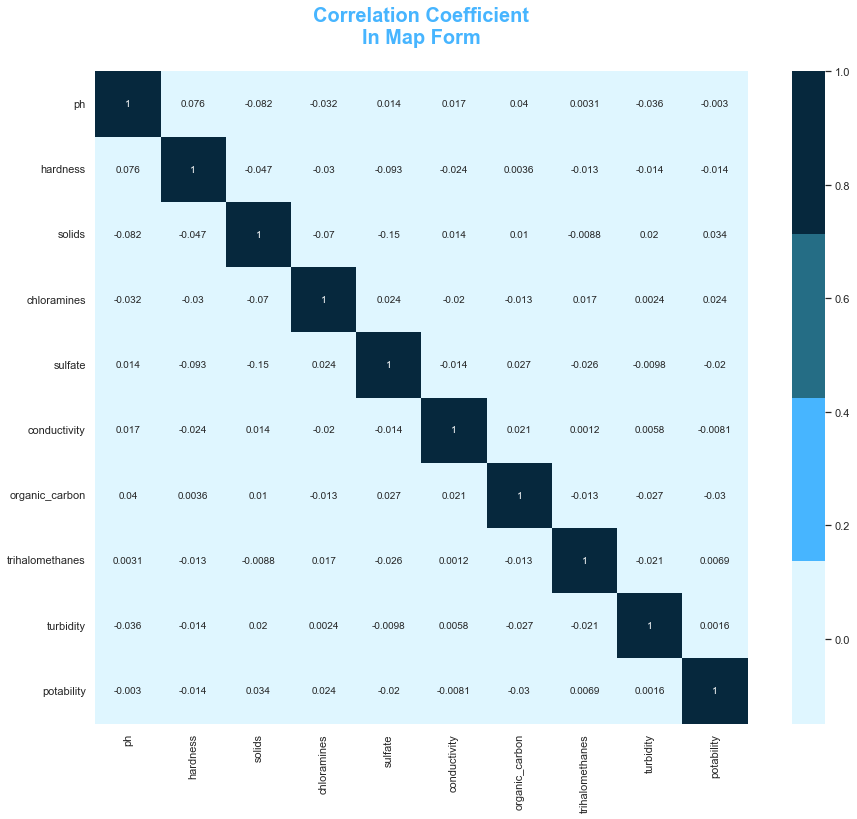

In [31]:
plt.figure(figsize=(16,12))
corr = data.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#mask = mask >>> You can add mask into heatmap to make half square
sns.heatmap(corr, annot=True, cmap=colors, square=True)
plt.title('Correlation Coefficient\nIn Map Form\n', fontdict={'fontsize':20,'fontweight':'bold','color':colors[1]})
plt.show()

In [32]:
df_corr_coef = pd.DataFrame(data.corrwith(data.potability),columns = ['corr_coef_value']).sort_values(ascending=False, by='corr_coef_value')
df_corr_coef

,corr_coef_value
potability,1.000000
solids,0.033743
chloramines,0.023779
trihalomethanes,0.006887
turbidity,0.001581
ph,-0.003014
conductivity,-0.008128
hardness,-0.013837
sulfate,-0.020476
organic_carbon,-0.030001


## SPLIT DATASET

In [33]:
df_train_full, df_test = train_test_split(data,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.3, random_state=1)

In [34]:
print('{}>>{}|{}|{}'.format(data.shape,df_train.shape, df_test.shape,df_val.shape))

(3276, 10)>>(1834, 10)|(656, 10)|(786, 10)


In [35]:
y_train = df_train.potability.values
y_val = df_val.potability.values

del df_train['potability']
del df_val['potability']

# LOGISTIC REGRESSION

## FEATURE ENGINEERING
**ONE-HOT ENCODING**

In [36]:
# Make a function named "train" with parameter "df" and "y" which can be reproduceable to another dataframe
def train(df,y):
    dv = DictVectorizer(sparse=False)
    cat = df.to_dict(orient='records')
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(X,y)
    return dv, model

In [37]:
def predict(df, dv, model):
    cat = df.to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [38]:
dv, model = train(df_train,y_train)

In [39]:
y_pred = predict(df_val, dv, model)

In [40]:
thresholds = np.linspace(0,1,11)
for t in thresholds:
    potability = y_pred >= t
    acc = accuracy_score(y_val, potability)
    print('t = %0.2f || acc = %0.3f' % (t, acc))

t = 0.00 || acc = 0.364
t = 0.10 || acc = 0.364
t = 0.20 || acc = 0.364
t = 0.30 || acc = 0.363
t = 0.40 || acc = 0.545
t = 0.50 || acc = 0.636
t = 0.60 || acc = 0.636
t = 0.70 || acc = 0.636
t = 0.80 || acc = 0.636
t = 0.90 || acc = 0.636
t = 1.00 || acc = 0.636


In [41]:
potability = y_pred >= 0.5

In [42]:
print('Output: %0.3f' % (y_val == potability).mean())

Output: 0.636


## PARAMETER TUNING | K-FOLD CROSS-VALIDATION

In [43]:
def train(df,y,c):
    dv = DictVectorizer(sparse=False)
    cat = df.to_dict(orient='records')
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', random_state=1, C=c)
    model.fit(X,y)
    return dv, model

In [44]:
# Make a function
nfolds = 10
kfold = KFold(n_splits = nfolds, shuffle = True, random_state=1)
for C in [0.001,0.01,0.1,0.5,1,10]:
    aucs = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.potability.values
        y_val = df_val.potability.values

        dv, model = train(df_train, y_train, c=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    print('C = %s , auc = %0.3f +- %0.3f' % (C,np.mean(aucs), np.std(aucs)))

C = 0.001 , auc = 0.999 +- 0.003
C = 0.01 , auc = 1.000 +- 0.000
C = 0.1 , auc = 1.000 +- 0.000
C = 0.5 , auc = 1.000 +- 0.000
C = 1 , auc = 1.000 +- 0.000
C = 10 , auc = 1.000 +- 0.000


In [45]:
# Use c = 0.1
y_test = df_test.potability.values

dv, model = train(df_train, y_train, c=0.1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

print('auc = %0.3f +- %0.3f' % (np.mean(auc), np.std(auc)))

auc = 1.000 +- 0.000


# DECISION TREE

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
df_train_full, df_test = train_test_split(data,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.3, random_state=1)

In [48]:
df_train.potability.value_counts()

0    1125
1     709
Name: potability, dtype: int64

In [49]:
y_train = (df_train.potability == 1).values
y_val = (df_val.potability == 1).values

del df_train['potability']
del df_val['potability']

In [50]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient = 'records')

In [51]:
dv = DictVectorizer(sparse=False)

In [52]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [53]:
for depth in [1,2,3,4,5,6,10,12,15,17,19,20,None]:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth,auc))

   1 -> 0.508
   2 -> 0.535
   3 -> 0.537
   4 -> 0.576
   5 -> 0.572
   6 -> 0.584
  10 -> 0.589
  12 -> 0.597
  15 -> 0.592
  17 -> 0.576
  19 -> 0.594
  20 -> 0.588
None -> 0.572


In [54]:
 for m in [15,17,19]:
        print('depth: %s' % m)
        for s in [1,5,10,15,20,50,100,200]:
            dt = DecisionTreeClassifier(max_depth = m, min_samples_leaf=s)
            dt.fit(X_train, y_train)
            y_pred = dt.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_pred)
            print('%s -> %.3f' % (s,auc))

depth: 15
1 -> 0.600
5 -> 0.626


10 -> 0.627
15 -> 0.600
20 -> 0.596
50 -> 0.564
100 -> 0.558
200 -> 0.551
depth: 17
1 -> 0.572
5 -> 0.594
10 -> 0.628
15 -> 0.602
20 -> 0.594
50 -> 0.564
100 -> 0.558
200 -> 0.551
depth: 19
1 -> 0.590
5 -> 0.609
10 -> 0.621
15 -> 0.597
20 -> 0.588
50 -> 0.564
100 -> 0.558
200 -> 0.551


#### THE BEST AUC = 0.633
***depth =  15, min_samples_leaf = (1,5,10)***

## RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
aucs = []
for i in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s --> %.3f' % (i,auc))
    
    aucs.append(auc)

10 --> 0.608
20 --> 0.634
30 --> 0.634
40 --> 0.649
50 --> 0.650
60 --> 0.654
70 --> 0.653
80 --> 0.654
90 --> 0.651
100 --> 0.654
110 --> 0.654
120 --> 0.656
130 --> 0.657
140 --> 0.658
150 --> 0.660
160 --> 0.659
170 --> 0.657
180 --> 0.658
190 --> 0.659
200 --> 0.661


Text(0, 0.5, 'AUC')

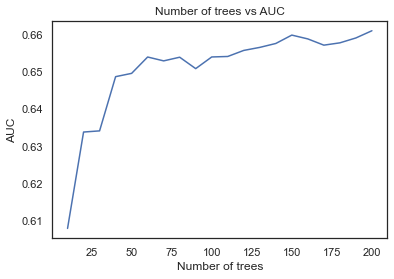

In [57]:
plt.plot(range(10,201,10), aucs)
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

In [58]:
all_aucs = {}
for depth in [15,17,19]:
    print('depth : %s' % depth)
    aucs = []
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth = depth, random_state = 3)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s --> %.3f' % (i,auc))
        aucs.append(auc)
    all_aucs[depth] = aucs
    print()


depth : 15
10 --> 0.611
20 --> 0.625
30 --> 0.616
40 --> 0.626
50 --> 0.633
60 --> 0.637
70 --> 0.640
80 --> 0.648
90 --> 0.645
100 --> 0.653
110 --> 0.655
120 --> 0.656
130 --> 0.657
140 --> 0.659
150 --> 0.661
160 --> 0.658
170 --> 0.658
180 --> 0.656
190 --> 0.658
200 --> 0.659

depth : 17
10 --> 0.618
20 --> 0.624
30 --> 0.639
40 --> 0.644
50 --> 0.642
60 --> 0.645
70 --> 0.648
80 --> 0.650
90 --> 0.649
100 --> 0.650
110 --> 0.653
120 --> 0.653
130 --> 0.656
140 --> 0.656
150 --> 0.658
160 --> 0.657
170 --> 0.657
180 --> 0.658
190 --> 0.658
200 --> 0.659

depth : 19
10 --> 0.590
20 --> 0.616
30 --> 0.622
40 --> 0.628
50 --> 0.641
60 --> 0.646
70 --> 0.645
80 --> 0.652
90 --> 0.647
100 --> 0.652
110 --> 0.653
120 --> 0.657
130 --> 0.655
140 --> 0.658
150 --> 0.662
160 --> 0.661
170 --> 0.661
180 --> 0.660
190 --> 0.659
200 --> 0.661



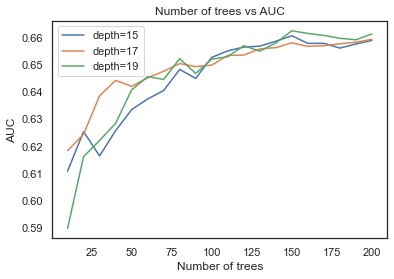

In [59]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[15],label = 'depth=15')
plt.plot(num_trees, all_aucs[17],label = 'depth=17')
plt.plot(num_trees, all_aucs[19],label = 'depth=19')
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

In [60]:
all_aucs = {}
for m in [1,5,10]:
    print('min_samples_leaf : %s' % m)
    aucs = []
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth = 19,min_samples_leaf=m, random_state = 3)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s --> %.3f' % (i,auc))
        aucs.append(auc)
    all_aucs[m] = aucs
    print()

min_samples_leaf : 1
10 --> 0.590
20 --> 0.616
30 --> 0.622
40 --> 0.628
50 --> 0.641
60 --> 0.646
70 --> 0.645
80 --> 0.652
90 --> 0.647
100 --> 0.652
110 --> 0.653
120 --> 0.657
130 --> 0.655
140 --> 0.658
150 --> 0.662
160 --> 0.661
170 --> 0.661
180 --> 0.660
190 --> 0.659
200 --> 0.661

min_samples_leaf : 5
10 --> 0.601
20 --> 0.633
30 --> 0.642
40 --> 0.642
50 --> 0.638
60 --> 0.646
70 --> 0.642
80 --> 0.642
90 --> 0.641
100 --> 0.644
110 --> 0.641
120 --> 0.643
130 --> 0.641
140 --> 0.644
150 --> 0.646
160 --> 0.648
170 --> 0.646
180 --> 0.648
190 --> 0.647
200 --> 0.649

min_samples_leaf : 10
10 --> 0.597
20 --> 0.621
30 --> 0.626
40 --> 0.633
50 --> 0.635
60 --> 0.638
70 --> 0.637
80 --> 0.640
90 --> 0.643
100 --> 0.643
110 --> 0.645
120 --> 0.645
130 --> 0.644
140 --> 0.645
150 --> 0.645
160 --> 0.645
170 --> 0.646
180 --> 0.648
190 --> 0.649
200 --> 0.649



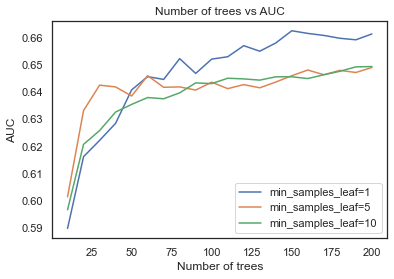

In [61]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[1],label = 'min_samples_leaf=1')
plt.plot(num_trees, all_aucs[5],label = 'min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10],label = 'min_samples_leaf=10')
plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

### THE BEST AUC = 0.662
***depth = 19, min_samples_leaf = 1, tree = 150***

## XGBoost: Extreme Gradient Boosting

In [62]:
import xgboost as xgb

In [63]:
# Wrap our data into DMatrix: a special data structure for finding splits efficiently
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [64]:
xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':19,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

In [65]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [66]:
model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

[0]	train-auc:0.92548	val-auc:0.59215
[10]	train-auc:0.95687	val-auc:0.60077


[20]	train-auc:0.96981	val-auc:0.61889
[30]	train-auc:0.98228	val-auc:0.62305
[40]	train-auc:0.98834	val-auc:0.62947
[50]	train-auc:0.99320	val-auc:0.63521
[60]	train-auc:0.99594	val-auc:0.64062
[70]	train-auc:0.99723	val-auc:0.64529
[80]	train-auc:0.99805	val-auc:0.64520
[90]	train-auc:0.99859	val-auc:0.64880
[100]	train-auc:0.99893	val-auc:0.65074
[110]	train-auc:0.99915	val-auc:0.64972
[120]	train-auc:0.99937	val-auc:0.64927
[130]	train-auc:0.99947	val-auc:0.65027
[140]	train-auc:0.99954	val-auc:0.64962
[150]	train-auc:0.99966	val-auc:0.64863
[160]	train-auc:0.99974	val-auc:0.64831
[170]	train-auc:0.99983	val-auc:0.64836
[180]	train-auc:0.99986	val-auc:0.64908
[190]	train-auc:0.99990	val-auc:0.64877
[200]	train-auc:0.99991	val-auc:0.64897
[210]	train-auc:0.99994	val-auc:0.64949
[220]	train-auc:0.99995	val-auc:0.64990
[230]	train-auc:0.99997	val-auc:0.65127
[240]	train-auc:0.99999	val-auc:0.65237
[250]	train-auc:0.99999	val-auc:0.65242
[260]	train-auc:1.00000	val-auc:0.65319
[270]	tr

In [67]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [68]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val 

In [69]:
tree,aucs_train,aucs_val = parse_xgb_output(output)

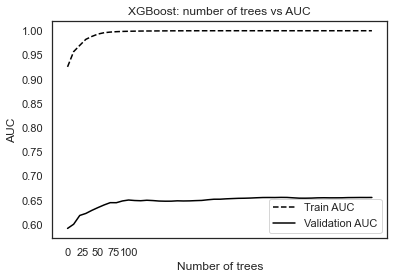

In [70]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

**parameter tunning: eta/learning_rate**

In [71]:
%%capture output

xgb_params = {
    'eta':0.1, #learning rate
    'max_depth':10,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [72]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.6496
(0.6496, 30)


In [73]:
%%capture output

xgb_params = {
    'eta':0.05, #learning rate
    'max_depth':10,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [74]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.65031
(0.65031, 340)


In [75]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':10,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [76]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.65523
(0.65523, 250)


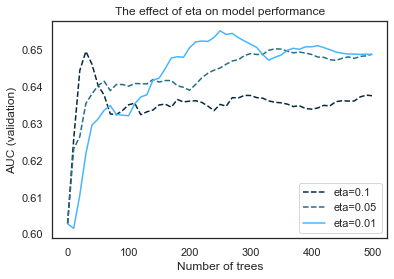

In [77]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color=colors[3], linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color=colors[2], linestyle='dashed', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color=colors[1], linestyle='solid', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

**Parameter Tuning: max_depth**

In [78]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':15,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [79]:
tree, _, aucs_val_depth15 = parse_xgb_output(output)
print(max(aucs_val_depth15))
print(max(zip(aucs_val_depth15, tree)))

0.64588
(0.64588, 380)


In [80]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':17,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [81]:
tree, _, aucs_val_depth17 = parse_xgb_output(output)
print(max(aucs_val_depth17))
print(max(zip(aucs_val_depth17, tree)))

0.64765
(0.64765, 140)


In [82]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':19,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [83]:
tree, _, aucs_val_depth19 = parse_xgb_output(output)
print(max(aucs_val_depth19))
print(max(zip(aucs_val_depth19, tree)))

0.65617
(0.65617, 350)


In [84]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':10,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [85]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val_depth10))
print(max(zip(aucs_val_depth10, tree)))

0.65523
(0.65523, 250)


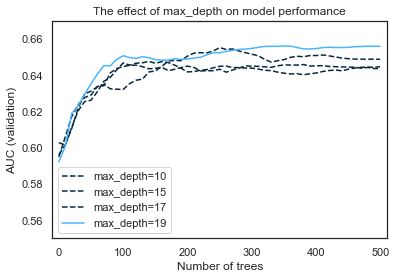

In [86]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth10, color=colors[3], linestyle='dashed', label='max_depth=10')
plt.plot(tree, aucs_val_depth15, color=colors[3], linestyle='dashed', label='max_depth=15')
plt.plot(tree, aucs_val_depth17, color=colors[3], linestyle='dashed', label='max_depth=17')
plt.plot(tree, aucs_val_depth19, color=colors[1], linestyle='solid', label='max_depth=19')

plt.ylim(0.55, 0.67)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

**Parameter Tunning: min_child_weight**

In [87]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':19,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [88]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.65617
(0.65617, 350)


In [89]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':19,
    'min_child_weight':5,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [90]:
tree, _, aucs_val_mcw5 = parse_xgb_output(output)
print(max(aucs_val_mcw5))
print(max(zip(aucs_val_mcw5, tree)))

0.64273
(0.64273, 460)


In [91]:
%%capture output

xgb_params = {
    'eta':0.01, #learning rate
    'max_depth':19,
    'min_child_weight':10,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    #'silent':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=500,verbose_eval=10, evals=watchlist)

In [92]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.66014
(0.66014, 440)


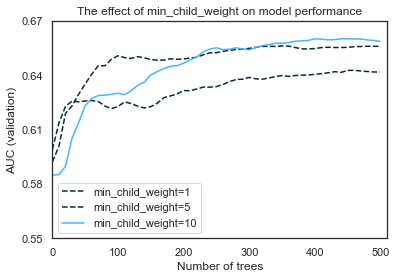

In [93]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color=colors[3], linestyle='dashed', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw5, color=colors[3], linestyle='dashed', label='min_child_weight=5')
plt.plot(tree, aucs_val_mcw10, color=colors[1], linestyle='solid', label='min_child_weight=10')

plt.ylim(0.55, 0.67)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.55, 0.67, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

### THE BEST AUC = 0.660
***eta=0.01, depth = 19, min_samples_leaf = 10, tree = 440***